In [6]:
import os
import pandas as pd
import requests

PATH = r'./'
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
with open (PATH+'iris.data','w') as f:
    f.write(r.text)
os.chdir(PATH)
os.getcwd()

'/Users/yangjiahui/Desktop/Machine Learning/PYML_ch1'

In [7]:
df = pd.read_csv(PATH+'iris.data', names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])


In [8]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

第二行设置风格为近似R中的ggplot库（需要matplotlib 1.41）

第三行设置插图，**使它们在记事本中可见**

Text(0.5,1.01,'Iris Petal Width')

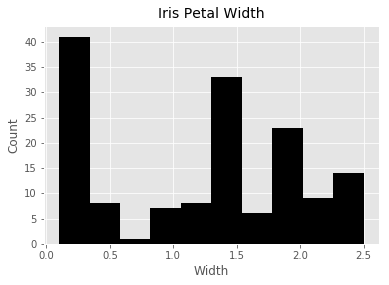

In [10]:
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(df['petal width'], color = 'black')
ax.set_ylabel('Count', fontsize = 12)
ax.set_xlabel('Width',fontsize = 12)
plt.title('Iris Petal Width', fontsize = 14, y=1.01)

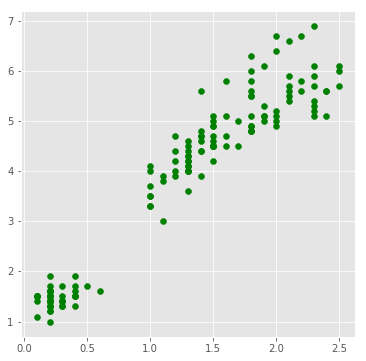

In [11]:
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(df['petal width'], df['petal length'], color = 'green')

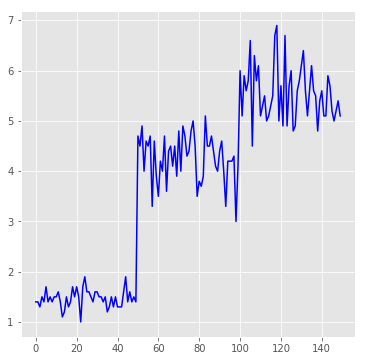

In [12]:
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(df['petal length'], color='blue')

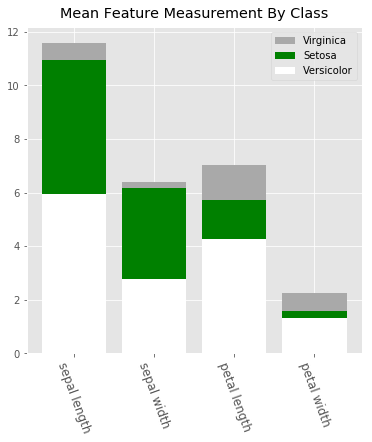

In [13]:
fig, ax = plt.subplots(figsize= (6,6))
bar_width = .8
labels = [x for x in df.columns if 'length' in x or 'width' in x]
ver_y = [df[df['class'] == 'Iris-versicolor'][x].mean() for x in labels]
vir_y = [df[df['class'] == 'Iris-virginica'][x].mean() for x in labels]
set_y = [df[df['class'] == 'Iris-setosa'][x].mean() for x in labels]
x = np.arange(len(labels))
ax.bar(x, vir_y, bar_width, bottom = set_y, color='darkgrey')
ax.bar(x, set_y, bar_width, bottom = ver_y, color='green')
ax.bar(x, ver_y, bar_width, color = 'white')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation= -70, fontsize = 12)
ax.set_title('Mean Feature Measurement By Class', y=1.01)
ax.legend(['Virginica','Setosa','Versicolor'])

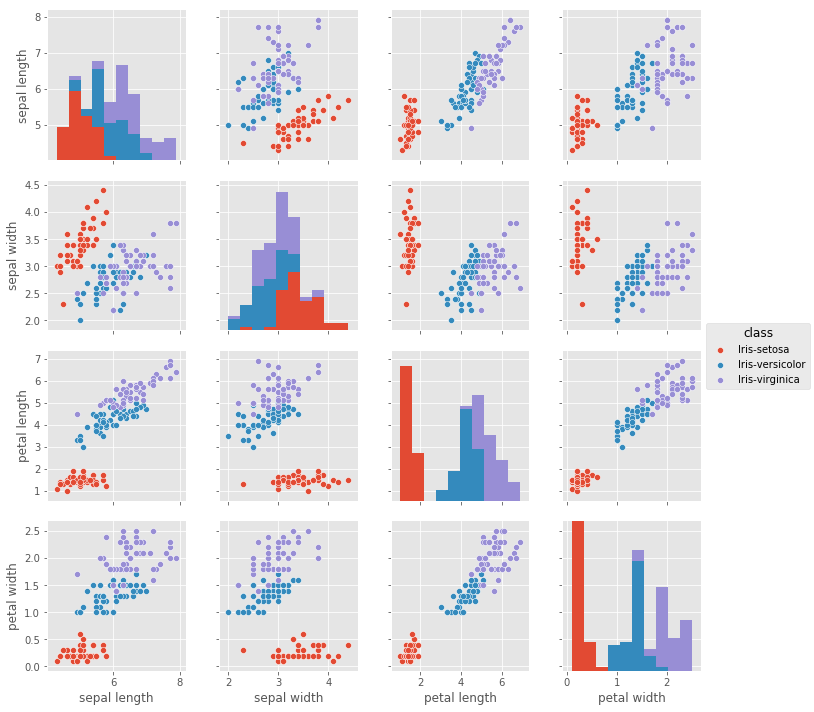

In [15]:
import seaborn as sns
sns.pairplot(df, hue='class')

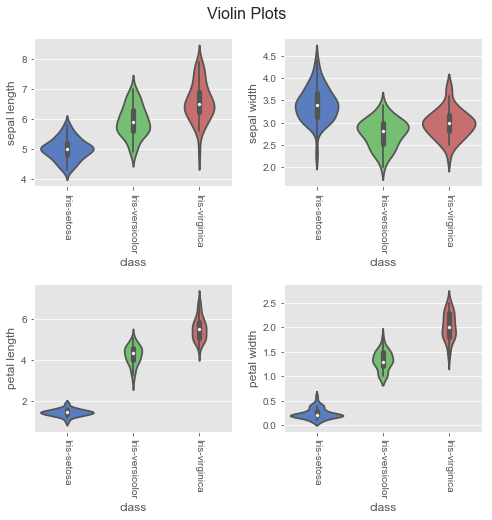

In [18]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
sns.set(style='white', palette='muted')
sns.violinplot(x=df['class'], y=df['sepal length'], ax=ax[0,0])
sns.violinplot(x=df['class'], y=df['sepal width'], ax=ax[0,1])
sns.violinplot(x=df['class'], y=df['petal length'], ax=ax[1,0])
sns.violinplot(x=df['class'], y=df['petal width'], ax=ax[1,1])
fig.suptitle('Violin Plots', fontsize=16, y=1.03)
for i in ax.flat:
    plt.setp(i.get_xticklabels(), rotation=-90)
fig.tight_layout()